# Support Vector Machine(SVM)
-하이퍼 파라미터의 특징 살펴보기

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1)Data 

In [5]:
# sample data 생성
# 태극 문의 같은 데이터셋 만들어줌
X,y = make_moons(n_samples=30, noise=0.2, random_state=1234)
print(X.shape)
print(y.shape)

(30, 2)
(30,)


In [6]:
z = {'x': X[:,0], 'y': X[:,1], 'label': y}
df = pd.DataFrame(z)
df.head()

,x,y,label
0,-0.051388,0.814918,0
1,-0.258767,0.329892,0
2,0.589309,1.072602,0
3,1.352354,-0.128771,0
4,1.618698,0.735524,1


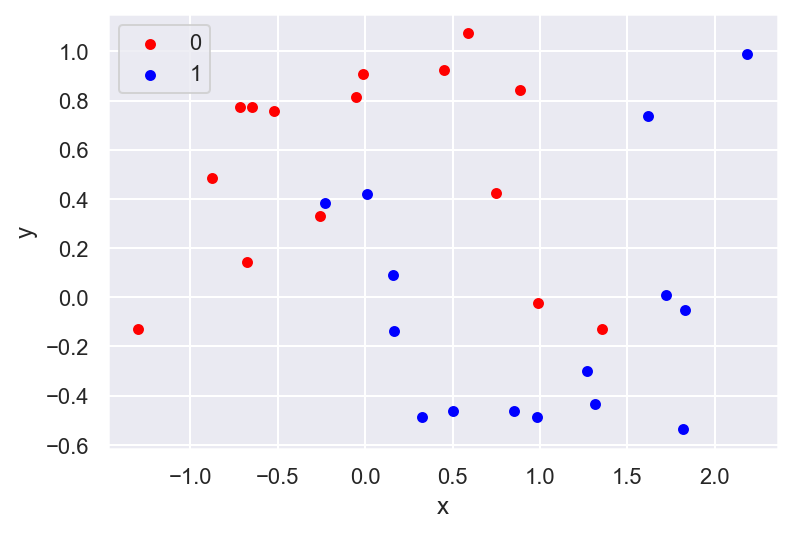

In [7]:

colors = { 0: "red", 1:"blue"}
fig, ax = plt.subplots()
grouped = df.groupby('label') #print: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000025D24DDDD88>

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key]) 
    # group : label이 '0'인 df행  -->  group: label이 '1'인 df행 
    # key는 index 값
    


## 2)Model

In [16]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)

SVC()

## 3)Effect of hyperparameter

- cost : Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. 이거 지금 내가 알고 있는 C의 역수인 것 같다. C가 클수록, 규제 약한 상황. 

- gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’(In SVC, default is 'rbf' kernel).

In [18]:
np.c_[[1, 2, 3], [4, 5, 6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [26]:
# Hyperparameter Boundary
cost = [ 0.1, 1, 10 ]  
gamma = [ 0.1, 1, 10 ]

fig, axs = plt.subplots(len(cost), len(gamma), figsize=(15, 10))

for i, c in enumerate(cost):
    for j, g in enumerate(gamma):
        clf = SVC(C = c , gamma=g )
        clf.fit(X, y)

        axs[i, j].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1] ,facecolors='none' , zorder=11, edgecolors='k', s= 100) 
                                 # s = marker size , facecolors = 'none' --> marker 색 뺴기
        axs[i, j].scatter(X[:,0], X[:,1], zorder=10, c=y, cmap=plt.cm.Blues, edgecolors='k')                                                                
        
        x_min = -3
        x_max = 3
        y_min = -3
        y_max = 3 
        
        XX, YY = np.mgrid[x_min: x_max: 200j, y_min: y_max: 200j] # for문의 j가 아님
        Z =  clf.decision_function( np.c_ [XX.ravel(), YY.ravel()])  # Z: (40000,) 
        Z = Z.reshape(XX.shape)  #(200, 200)
        
        axs[i, j].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Decision boundary
        axs[i, j].contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])  
        axs[i, j].set_title(f'[cost: {c}, gamma: {g}]')
        plt.xlim(x_min, x_max) #그래프 범위 표시
        plt.ylim(y_min, y_max)
        plt.xticks(())  #그래프 눈금 표시
        plt.yticks(())

        
axs[-1, 1].set_xlabel('gamma')
axs[ 0, 0].set_ylabel('cost')
fig.suptitle('(cost, gamma)', fontsize=16)
plt.close(fig)

<ipython-input-26-176508634ea6>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i, j].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Decision boundary
<ipython-input-26-176508634ea6>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i, j].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Decision boundary
<ipython-input-26-176508634ea6>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.

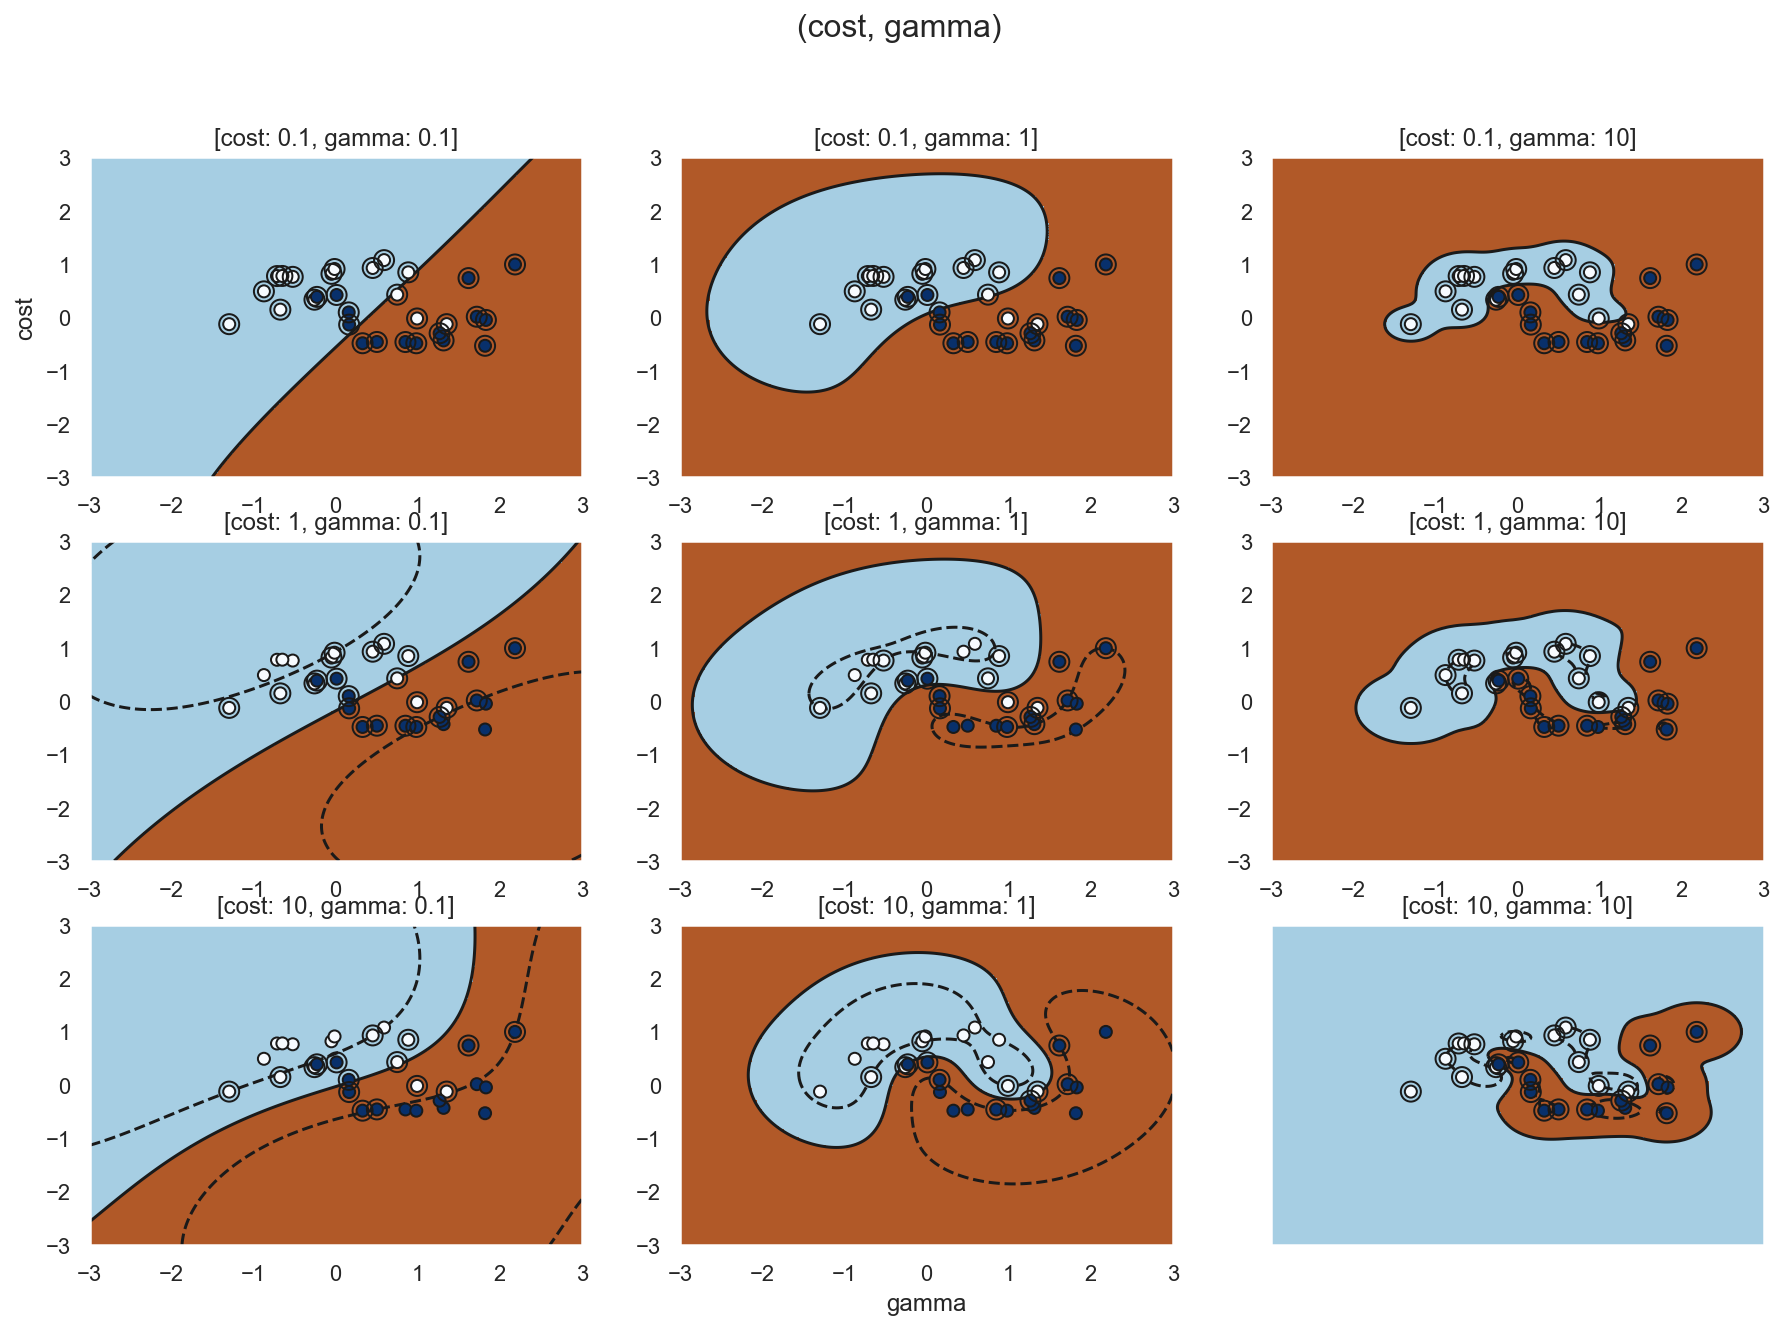

In [27]:
fig

- cost가 커질수록, boundary가 오버피팅 되가는 경향이 보인다. 
    - C가 커진다는 것은, 오류 절대 허용 안하겠다는 것. 즉, 진짜 비짚고 들어가서 피팅 하게 된다. 
- gamma는 kernel ridge에서와 마찬가지로 표준편차의 역수. 
    - gamma 커질수록, 표준편차가 작아지고, 데이터 경계를 쫙 붙어서 decision boundary가 그려진다. 
    - gamma가 작아질수록 표준편차가 커지고, 데이터에서 조금 여유롭게 간다. 

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.